In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
# set hyperparameters
lr = 0.0002
batch_size = 128
z_dim = 100 # dimension of the noise vector
image_size = 28*28
epochs = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root='dataset/', train=True, transform=transform, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

100.0%
100.0%
100.0%
100.0%


In [5]:
# generator function
class Generator(nn.Module):
    def __init__(self, z_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512,1024),
            nn.ReLU(),
            nn.Linear(1024, image_size),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.model(x)

In [6]:
# discriminator function
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256,1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.model(x)

In [7]:
# initialize the generator and discriminator
gen = Generator(z_dim).to(device)
disc = Discriminator().to(device)

In [8]:
# define loss and initialize the optimizer
criterion = nn.BCELoss() # binary cross entropy loss
g_optimizer = optim.Adam(gen.parameters(), lr=lr, betas=(0.5, 0.999)) # optimizer for the generator
d_optimizer = optim.Adam(disc.parameters(), lr=lr, betas=(0.5, 0.999)) # optimizer for the discriminator

Epoch [1/50] | D Loss: 1.2950 | G Loss: 0.8548 | D Accuracy: 59.53%


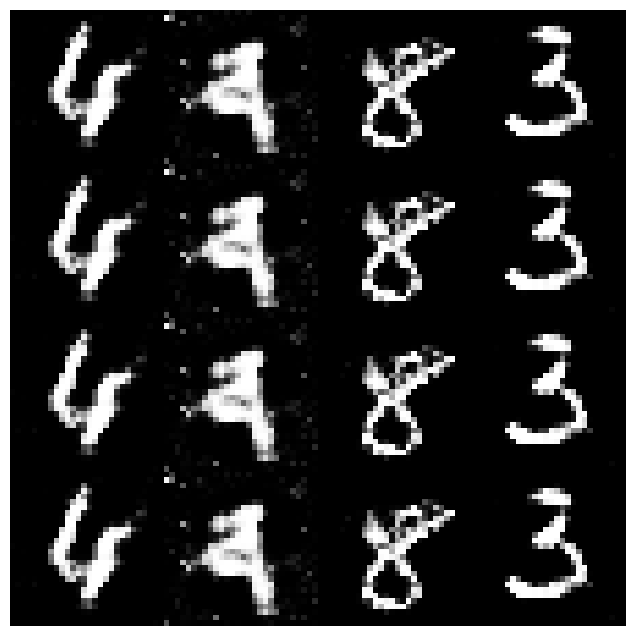

Epoch [2/50] | D Loss: 1.2961 | G Loss: 0.7911 | D Accuracy: 60.49%
Epoch [3/50] | D Loss: 1.2127 | G Loss: 0.8451 | D Accuracy: 60.64%
Epoch [4/50] | D Loss: 1.3952 | G Loss: 0.8541 | D Accuracy: 61.22%
Epoch [5/50] | D Loss: 1.2973 | G Loss: 0.8566 | D Accuracy: 61.41%
Epoch [6/50] | D Loss: 1.3453 | G Loss: 0.8485 | D Accuracy: 61.45%
Epoch [7/50] | D Loss: 1.2954 | G Loss: 0.8712 | D Accuracy: 61.74%
Epoch [8/50] | D Loss: 1.3835 | G Loss: 0.7922 | D Accuracy: 61.72%
Epoch [9/50] | D Loss: 1.3149 | G Loss: 0.8853 | D Accuracy: 61.38%
Epoch [10/50] | D Loss: 1.3065 | G Loss: 0.8824 | D Accuracy: 61.69%
Epoch [11/50] | D Loss: 1.2561 | G Loss: 0.8906 | D Accuracy: 61.59%


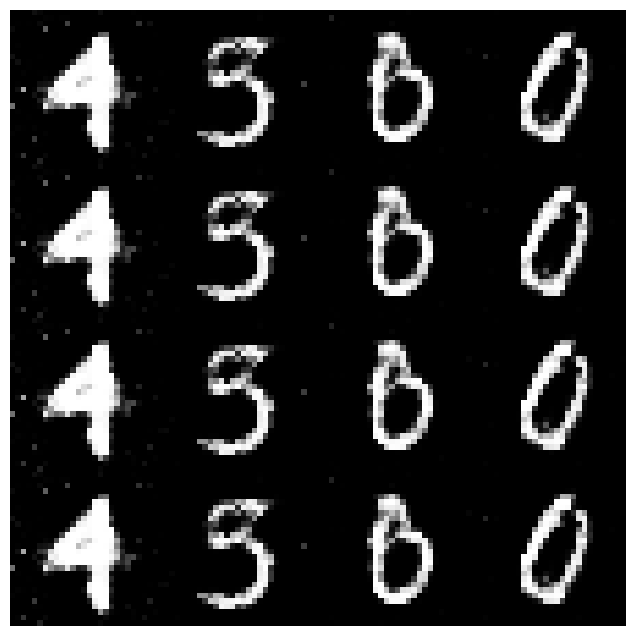

Epoch [12/50] | D Loss: 1.2756 | G Loss: 0.8483 | D Accuracy: 61.59%
Epoch [13/50] | D Loss: 1.2602 | G Loss: 0.9433 | D Accuracy: 61.41%
Epoch [14/50] | D Loss: 1.2706 | G Loss: 0.7927 | D Accuracy: 61.25%
Epoch [15/50] | D Loss: 1.2921 | G Loss: 0.8023 | D Accuracy: 61.54%
Epoch [16/50] | D Loss: 1.3086 | G Loss: 0.8684 | D Accuracy: 61.55%
Epoch [17/50] | D Loss: 1.3048 | G Loss: 0.8681 | D Accuracy: 61.15%
Epoch [18/50] | D Loss: 1.3287 | G Loss: 0.8604 | D Accuracy: 61.38%
Epoch [19/50] | D Loss: 1.3298 | G Loss: 0.9441 | D Accuracy: 61.27%
Epoch [20/50] | D Loss: 1.3276 | G Loss: 0.8845 | D Accuracy: 61.35%
Epoch [21/50] | D Loss: 1.3186 | G Loss: 0.8127 | D Accuracy: 61.35%


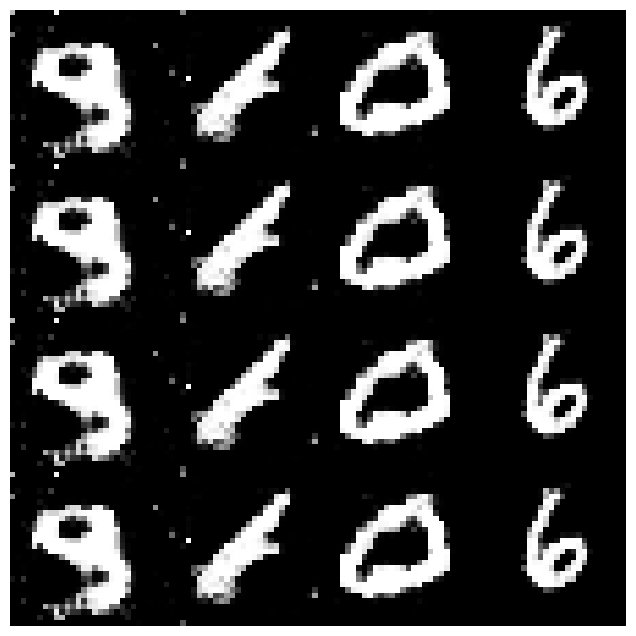

Epoch [22/50] | D Loss: 1.3095 | G Loss: 0.8369 | D Accuracy: 61.25%
Epoch [23/50] | D Loss: 1.3333 | G Loss: 0.8505 | D Accuracy: 61.27%
Epoch [24/50] | D Loss: 1.3088 | G Loss: 0.8912 | D Accuracy: 61.20%
Epoch [25/50] | D Loss: 1.3520 | G Loss: 0.8354 | D Accuracy: 61.23%
Epoch [26/50] | D Loss: 1.2586 | G Loss: 0.8177 | D Accuracy: 61.49%
Epoch [27/50] | D Loss: 1.3208 | G Loss: 0.8988 | D Accuracy: 61.49%
Epoch [28/50] | D Loss: 1.3001 | G Loss: 0.8186 | D Accuracy: 61.41%
Epoch [29/50] | D Loss: 1.2319 | G Loss: 0.8511 | D Accuracy: 61.23%
Epoch [30/50] | D Loss: 1.2392 | G Loss: 0.8811 | D Accuracy: 61.37%
Epoch [31/50] | D Loss: 1.2693 | G Loss: 0.9125 | D Accuracy: 61.35%


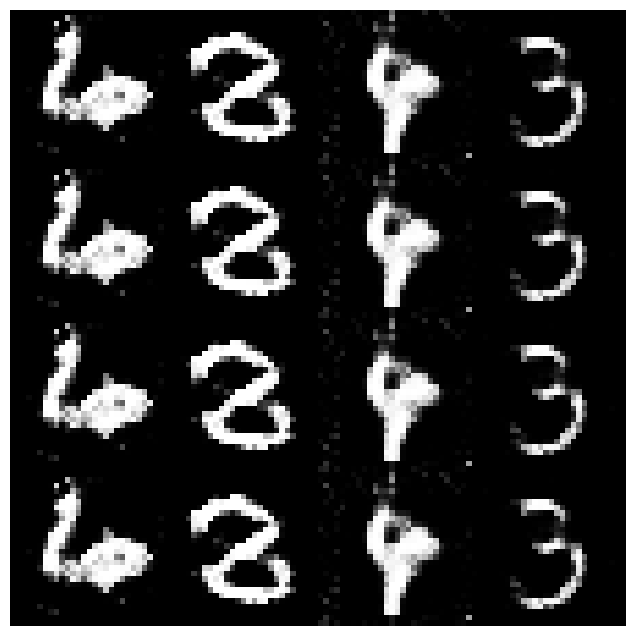

Epoch [32/50] | D Loss: 1.3386 | G Loss: 0.8281 | D Accuracy: 61.53%
Epoch [33/50] | D Loss: 1.3322 | G Loss: 0.8751 | D Accuracy: 60.99%
Epoch [34/50] | D Loss: 1.3016 | G Loss: 0.8517 | D Accuracy: 61.04%
Epoch [35/50] | D Loss: 1.2880 | G Loss: 0.8705 | D Accuracy: 60.85%
Epoch [36/50] | D Loss: 1.2769 | G Loss: 0.7699 | D Accuracy: 61.10%
Epoch [37/50] | D Loss: 1.2990 | G Loss: 0.8093 | D Accuracy: 61.07%
Epoch [38/50] | D Loss: 1.2907 | G Loss: 0.8677 | D Accuracy: 61.17%
Epoch [39/50] | D Loss: 1.3750 | G Loss: 0.8264 | D Accuracy: 60.98%
Epoch [40/50] | D Loss: 1.2771 | G Loss: 0.8374 | D Accuracy: 60.96%
Epoch [41/50] | D Loss: 1.3512 | G Loss: 0.9329 | D Accuracy: 60.92%


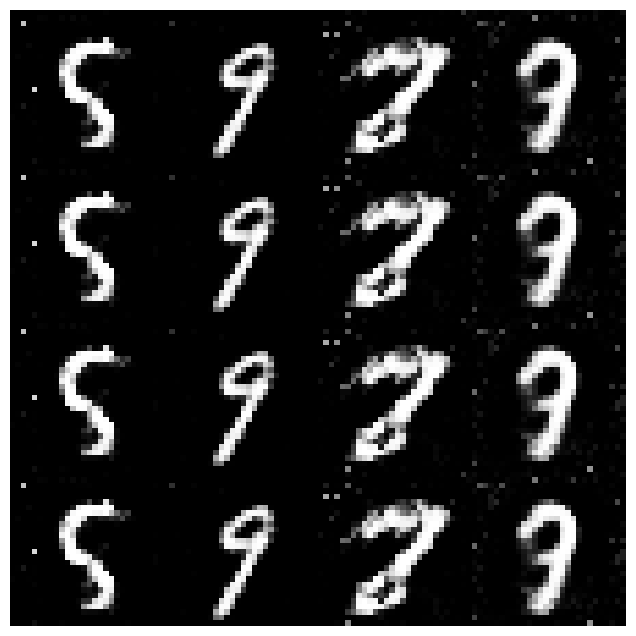

Epoch [42/50] | D Loss: 1.3293 | G Loss: 0.8737 | D Accuracy: 60.95%
Epoch [43/50] | D Loss: 1.3363 | G Loss: 0.8591 | D Accuracy: 61.10%
Epoch [44/50] | D Loss: 1.2679 | G Loss: 0.9547 | D Accuracy: 60.99%
Epoch [45/50] | D Loss: 1.2437 | G Loss: 0.9564 | D Accuracy: 61.18%
Epoch [46/50] | D Loss: 1.3161 | G Loss: 0.8116 | D Accuracy: 60.96%
Epoch [47/50] | D Loss: 1.3307 | G Loss: 0.8083 | D Accuracy: 61.08%
Epoch [48/50] | D Loss: 1.3142 | G Loss: 0.8033 | D Accuracy: 60.81%
Epoch [49/50] | D Loss: 1.2725 | G Loss: 0.8186 | D Accuracy: 61.05%
Epoch [50/50] | D Loss: 1.3584 | G Loss: 0.8508 | D Accuracy: 61.12%


In [17]:
# training loop
for epoch in range(epochs):
    correct_real = 0
    correct_fake = 0
    total_samples = 0
    
    for real, _ in loader:
        real = real.view(-1, image_size).to(device)
        batch_size = real.size(0)
        total_samples += batch_size * 2  # real + fake samples
        
        # train discriminator
        noise = torch.randn(batch_size, z_dim).to(device)
        fake = gen(noise)
        
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)
        
        real_preds = disc(real)
        fake_preds = disc(fake.detach())
        
        d_loss_real = criterion(real_preds, real_labels)
        d_loss_fake = criterion(fake_preds, fake_labels)
        d_loss = d_loss_real + d_loss_fake
        
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # discriminator accuracy
        correct_real += (real_preds > 0.5).sum().item()
        correct_fake += (fake_preds < 0.5).sum().item()
        
        # train generator
        fake = gen(noise)
        g_loss = criterion(disc(fake), real_labels)
        
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
    
    d_accuracy = (correct_real + correct_fake) / total_samples * 100
    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f} | D Accuracy: {d_accuracy:.2f}%")

    # show generated images
    if epoch % 10 == 0:
        gen.eval()  # evaluation mode
        with torch.no_grad():
            # generate samples
            sample = gen(torch.randn(16, z_dim).to(device))
            sample = sample.view(-1, 1, 28, 28).cpu()
            
            plt.figure(figsize=(8, 8))
            grid = np.concatenate([
                np.concatenate([sample[i].squeeze().numpy() for i in range(4)], axis=1)
                for j in range(4)
            ], axis=0)
            
            plt.imshow(grid, cmap='gray')
            plt.axis('off')
            
            plt.savefig(f'gan_images_epoch_{epoch}.png')
            plt.show()
            plt.close()
    gen.train()